In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [9]:
#load dataset
dta = sm.datasets.fair.load_pandas().data

dta['affair'] = (dta.affairs>0).astype(int)

In [10]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [11]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.


Text(0,0.5,'Frequency')

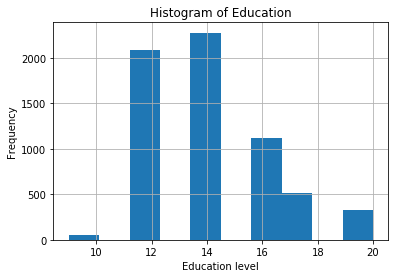

In [14]:
#data visualation: histogram for education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

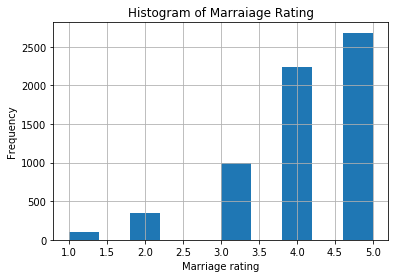

In [16]:
dta.rate_marriage.hist()
plt.title ('Histogram of Marraiage Rating')
plt.xlabel('Marriage rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

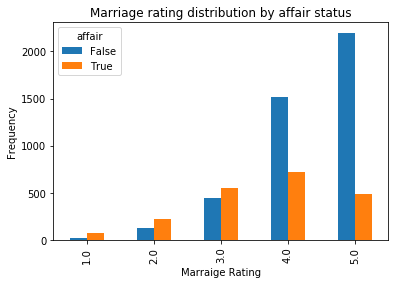

In [21]:
#barplot of marraige rating grouped by affair
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage rating distribution by affair status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

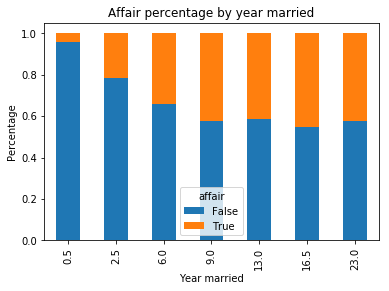

In [25]:
yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
yrs_married.div(yrs_married.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=True)
plt.title('Affair percentage by year married')
plt.xlabel('Year married')
plt.ylabel('Percentage')

In [26]:
#create dataframe for intercept column
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [27]:
#fit column names of X
X = X.rename(columns={'C(occupation)[T.2.0]':'occ_2', 
                      'C(occupation)[T.3.0]':'occ_3',
                      'C(occupation)[T.4.0]':'occ_4', 
                      'C(occupation)[T.5.0]':'occ_5', 
                      'C(occupation)[T.6.0]':'occ_6',
                      'C(occupation_husb)[T.2.0]':'occ_husb_2', 
                      'C(occupation_husb)[T.3.0]':'occ_husb_3',
                      'C(occupation_husb)[T.4.0]':'occ_husb_4', 
                      'C(occupation_husb)[T.5.0]':'occ_husb_5',
                      'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [28]:
#flattern y into a 1-D array
y = np.ravel(y)

In [34]:
#fit X and y with Logistic Regression
model = LogisticRegression()
model = model.fit(X,y)

#check accuracy on the training set
model.score(X,y)

0.7258875274897895

In [35]:
y.mean()

0.3224945020420987

In [38]:
pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,Intercept,[1.4898360570592706]
1,occ_2,[0.1880663965967619]
2,occ_3,[0.4989481225612341]
3,occ_4,[0.2506681436923961]
4,occ_5,[0.8390080011190776]
5,occ_6,[0.8339082482822548]
6,occ_husb_2,[0.19063622424850235]
7,occ_husb_3,[0.29783290491447884]
8,occ_husb_4,[0.16140913839761342]
9,occ_husb_5,[0.18777109156281066]


In [39]:
#model evaluation by train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
#predict labels for  test set
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [41]:
#Generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.35142488, 0.64857512],
       [0.90952576, 0.09047424],
       [0.72576603, 0.27423397],
       ...,
       [0.55736751, 0.44263249],
       [0.81213933, 0.18786067],
       [0.74729595, 0.25270405]])

In [42]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.7298429319371728
0.7459619860896347


The accuracy is 73% , which is the same as we experienced when training and predicting on the same data

In [47]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [48]:
# evaluate the model using cross-validation
scores = cross_val_score(LogisticRegression(),X,y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean)

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
<built-in method mean of numpy.ndarray object at 0x000000B1C30DE1C0>


The model is performing 73% accuracy

In [49]:
#Predicting the probability for affair using model
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]]))

array([[0.7747227, 0.2252773]])

The probability of affair is 23%